### **Question 3**

In [0]:
import numpy as np
import pandas as pd

In [0]:
df = pd.read_csv('/content/drive/My Drive/Datasets/Question-3/airfoil.csv',header=None)

**Data**

In [0]:
df

,0,1,2,3,4,5
0,8000.0,4.0,0.2286,39.6,0.004738,113.129
1,6300.0,0.0,0.0508,55.5,0.000762,132.796
2,400.0,4.0,0.2286,55.5,0.004286,123.274
3,1250.0,15.4,0.0508,39.6,0.028259,126.743
4,800.0,7.3,0.2286,39.6,0.012348,126.299
...,...,...,...,...,...,...
1197,3150.0,5.4,0.1524,31.7,0.005255,118.291
1198,2500.0,19.7,0.0508,39.6,0.036484,116.184
1199,800.0,2.0,0.2286,55.5,0.003135,128.492
1200,3150.0,3.3,0.1016,71.3,0.002028,132.114


In [0]:
label=df.values[:,-1]
data=df.values[:,:-1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
data=scaler.transform(data)

**After Normalization**

In [0]:
df1 = pd.DataFrame(data)
df1.insert(0,5,1)
data=df1.values
# data=np.transpose(data)

,5,0,1,2,3,4
0,1,0.393939,0.180180,0.727273,0.199495,0.074768
1,1,0.308081,0.000000,0.090909,0.601010,0.006227
2,1,0.010101,0.180180,0.727273,0.601010,0.066979
3,1,0.053030,0.693694,0.090909,0.199495,0.480233
4,1,0.030303,0.328829,0.727273,0.199495,0.205952
...,...,...,...,...,...,...
1197,1,0.148990,0.243243,0.454545,0.000000,0.083675
1198,1,0.116162,0.887387,0.090909,0.199495,0.622012
1199,1,0.030303,0.090090,0.727273,0.601010,0.047139
1200,1,0.148990,0.148649,0.272727,1.000000,0.028056


**Theta initialize**

In [0]:
from random import random
theta=[random(), random(),random(),random(),random(),random()]
print(theta)
theta=np.array(theta).reshape([1,6])
label=label.reshape([label.shape[0],1])
theta.shape
data.shape

[0.8559348345028602, 0.22278876480096066, 0.3101479492195317, 0.46691250178147115, 0.9522804322135079, 0.22597970557771074]


(1202, 6)

**Cost** **Function**

In [0]:
def cost_f(pre,label):
  sum=0
  for i in range(label.shape[0]):
    sum = sum +(pre[i]-label[i])*(pre[i]-label[i])
  return sum/(2* pre.shape[0])

 **Gradient Descent Algorithm**

In [0]:
def grad(theta,pre,label,X,al):
  alpha=al
  error=(pre-label)
  theta=theta - alpha * (np.dot(np.transpose(error),data)/label.shape[0])
  return theta

In [0]:
for i in range(3000):
  value=np.dot(theta,np.transpose(data))
  value=value.reshape([label.shape[0],1])
  theta=grad(theta,value,label,data)
  value=np.dot(theta,np.transpose(data))
  value=value.reshape([label.shape[0],1])
  new = cost_f(value,label)
from sklearn.metrics import r2_score
print(r2_score(label,value))

0.5256635936274878


# **Plot with 3 random theta**

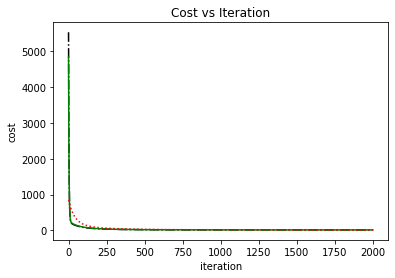

In [0]:
from random import random
from matplotlib import pyplot as ptl
it=[]
cost=[]
y=1
for j in range(3):
  it=[]
  cost=[]
  theta=[random()*y, random()*y,random()*y,random()*y,random()*y,random()*y]
  k=True
  old=0
  for i in range(2000):
    value=np.dot(theta,np.transpose(data))
    value=value.reshape([label.shape[0],1])
    theta=grad(theta,value,label,data)
    value=np.dot(theta,np.transpose(data))
    value=value.reshape([label.shape[0],1])
    new = cost_f(value,label)
    if(k):
      old=new
      k=False
    elif(old<=new):
      break
    else:
      old=new
    cost.append(new)
    it.append(i)
  if(j==1):
    ptl.plot(it,cost,'-g',linestyle='-')
  elif j==2:
    ptl.plot(it,cost, ':r',linestyle=':')
  else:
    ptl.plot(it,cost,'-.k',linestyle='-.')
  y=y*10
ptl.title("Cost vs Iteration")
ptl.ylabel("cost")
ptl.xlabel("iteration")
ptl.show()

**Plot with 3 random aplha(0.001,0.01,0.1)**

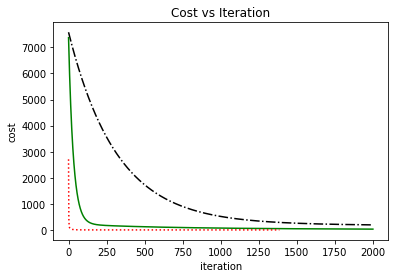

In [0]:
from random import random
from matplotlib import pyplot as ptl
it=[]
cost=[]
y=1
al=0.001
theta=[random(), random(),random(),random(),random(),random()]
old_theta=theta.copy()
for j in range(3):
  it=[]
  cost=[]
  k=True
  old=0
  theta=old_theta.copy()
  for i in range(2000):
    value=np.dot(theta,np.transpose(data))
    value=value.reshape([label.shape[0],1])
    theta=grad(theta,value,label,data,al)
    value=np.dot(theta,np.transpose(data))
    value=value.reshape([label.shape[0],1])
    new = cost_f(value,label)
    if(k):
      old=new
      k=False
    elif(old<=new):
      break
    else:
      old=new
    cost.append(new)
    it.append(i)
  if(j==1):
    ptl.plot(it,cost,'-g',linestyle='-')
  elif j==2:
    ptl.plot(it,cost, ':r',linestyle=':')
  else:
    ptl.plot(it,cost,'-.k',linestyle='-.')
  y=y*10
  al=al*y
ptl.title("Cost vs Iteration")
ptl.ylabel("cost")
ptl.xlabel("iteration")
ptl.show()